In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [18]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.2&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.3&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.4&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.5&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.6&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.7&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.9&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=1.0&num_states=1&num_tasks=15&period=[10, 100]&task_ma

In [19]:
cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [20]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [21]:
print(orig)
print(wo_drop)
print(ours)

[8.251, 8.243, 8.2248, 8.2498, 8.2564, 8.2624, 8.2448, 8.2512, 8.232, 8.2986, 8.237]
[3.9838, 11.461, 15.0968, 16.5234, 17.1074, 17.0084, 16.1928, 15.2822, 13.7926, 11.6834, 8.237]
[3.9838, 4.1752, 4.4718, 4.7882, 5.1204, 5.4638, 5.8042, 6.2226, 6.7944, 7.4956, 8.237]


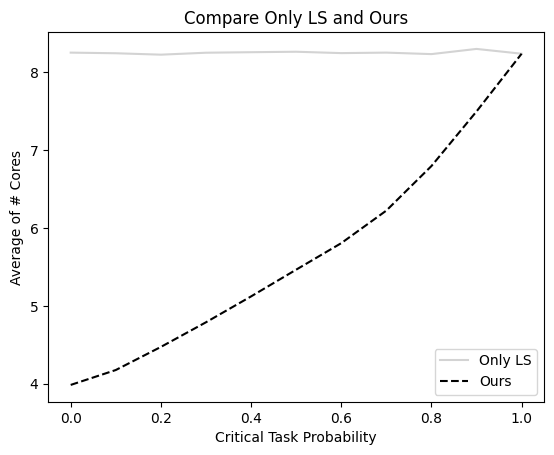

In [24]:
plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray')
# plt.plot(criticality_prob_list, wo_drop, label='wo_drop', color='black')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed')

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()